In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Functions import gen_Files
from sklearn.datasets import dump_svmlight_file, load_svmlight_file
from pylorentz import Momentum4

In [20]:
#From the TBranch data, create CSV's for ggH, data(A,B,C,D), and ggjj
gen_Files()

86.5299614361977
Done ggjj


In [9]:
#Open a file to access the different graphs 
df = pd.read_csv('./../CSVfiles/validation_data.csv')

In [10]:
#Quick look at the data
print(df.head)
print('This is {} percent signal data'.format((((len(df[df['label']==1]))/len(df))*100)))

<bound method NDFrame.head of          label      p_mass            p_pt           p_eta           p_phi  \
0          1.0  126.410409     5747.041490       -4.416696        1.325022   
1          1.0  125.459402    19795.799180        1.886285       -2.832595   
2          1.0  130.342274    12972.672258        2.352493       -1.021021   
3          1.0  123.891161    55423.848728       -1.820690       -0.651012   
4          1.0  125.667022   109407.453089        1.967308       -2.163187   
...        ...         ...             ...             ...             ...   
2813585    0.0  153.661000 -1000000.000000 -1000000.000000 -1000000.000000   
2813586    0.0  108.866000 -1000000.000000 -1000000.000000 -1000000.000000   
2813587    0.0   95.846800 -1000000.000000 -1000000.000000 -1000000.000000   
2813588    0.0  141.737000 -1000000.000000 -1000000.000000 -1000000.000000   
2813589    0.0   99.163900 -1000000.000000 -1000000.000000 -1000000.000000   

               p_E  photon_sep   

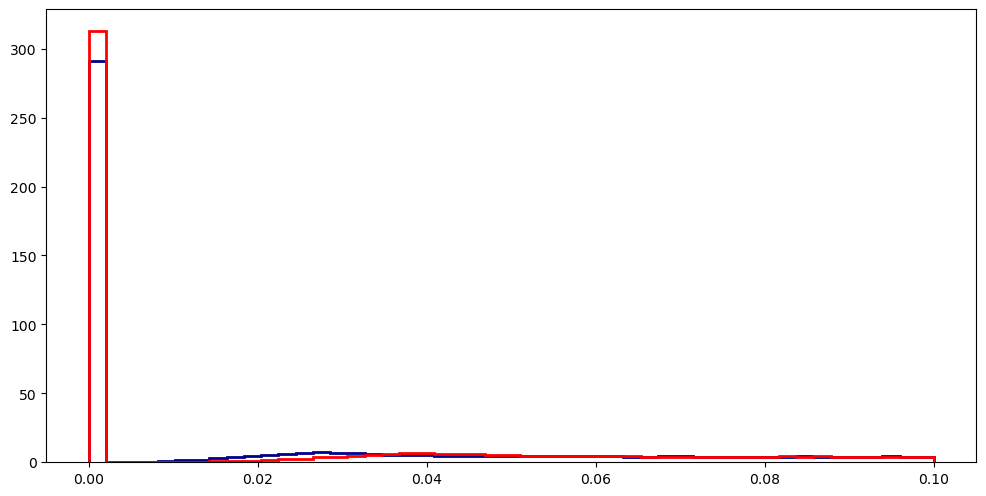

60.80232560856773
68.43930446730899


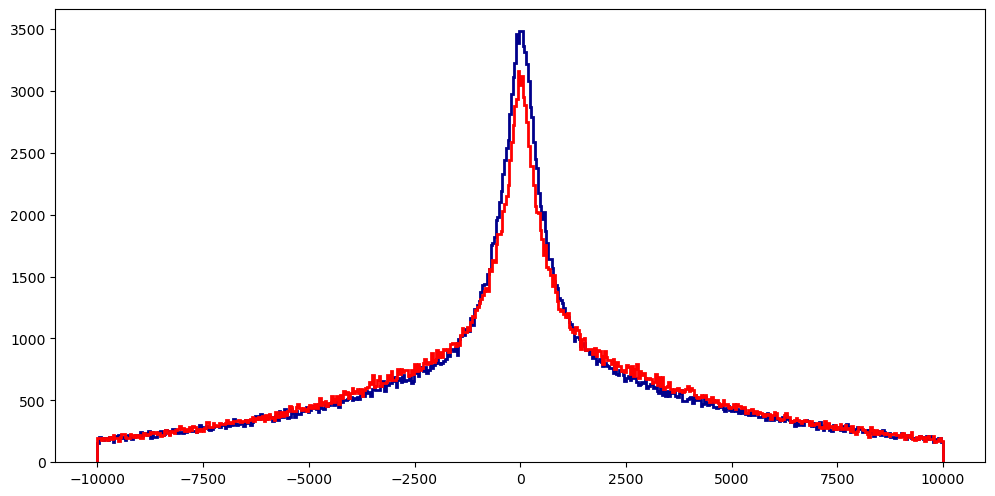

50.09989928282831
50.110181314277305


In [8]:
#For checkng ptcone, etacone
div1 = df['g1_ptcone']/df['g1_pt']
div2 = df['g2_ptcone']/df['g2_pt']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0,0.1]
bins = np.linspace(xlims[0],xlims[1],50,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, density = True, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, density = True,histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.05]))/(len(div1)))*100)
print(((len(div2[div2>0.05]))/(len(div2)))*100)

div1 = df['g1_etacone']/df['g1_eta']
div2 = df['g2_etacone']/df['g2_eta']
plt.figure(figsize=(12,6), dpi= 100)
xlims=[-10000,10000]
bins = np.linspace(xlims[0],xlims[1],500,endpoint=True)
plt.hist(div1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(div2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

#percent background using this cut
print(((len(div1[div1>0.065]))/(len(div1)))*100)
print(((len(div2[div2>0.065]))/(len(div2)))*100)

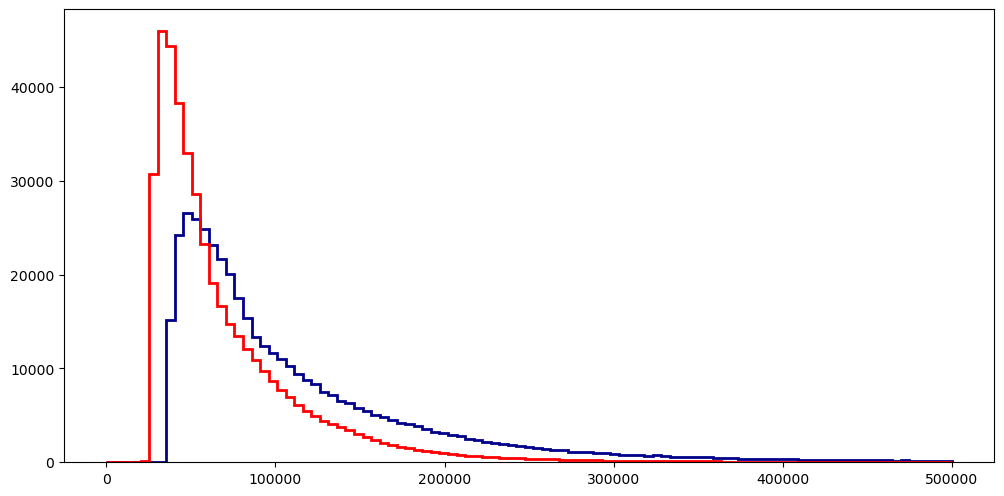

35008.1
25005.1


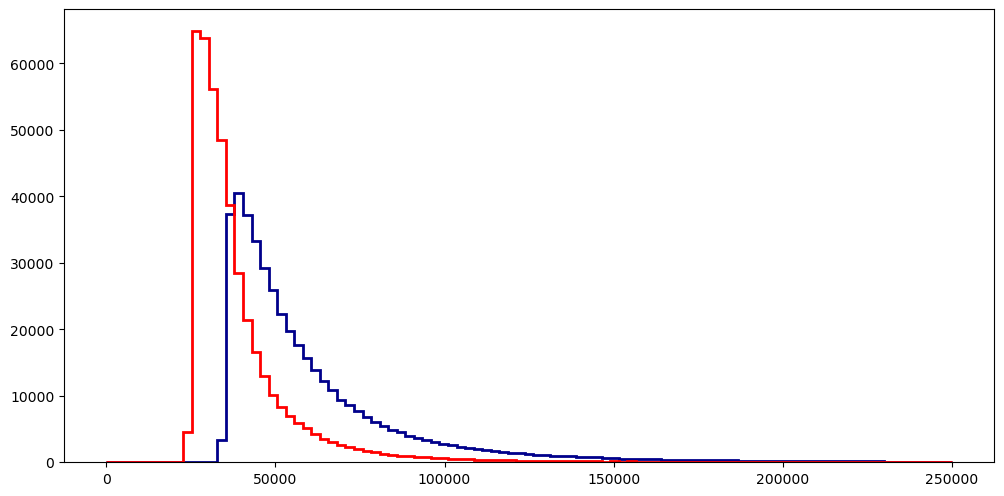

35000.1
25000.2


In [9]:
#for checking energy values
en1 = df['g1_E'].values
en2 = df['g2_E'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 500000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(en1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(en2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(en1))
print(min(en2))

pt1 = df['g1_pt'].values
pt2 = df['g2_pt'].values
plt.figure(figsize=(12,6), dpi= 100)
xlims=[0, 250000]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(pt1, color = 'darkblue', bins=bins, histtype='step', linewidth=2)
plt.hist(pt2, color = 'red', bins=bins, histtype='step', linewidth=2)
plt.show()

print(min(pt1))
print(min(pt2))

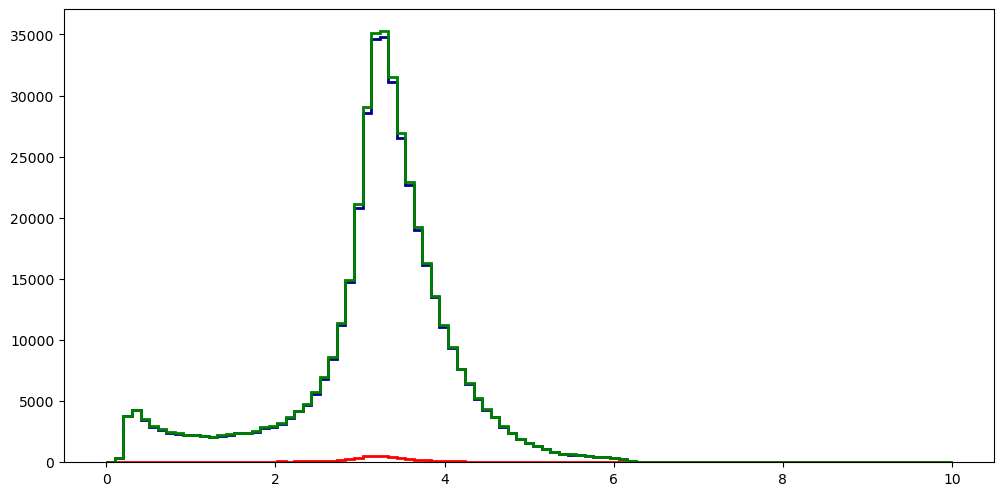

0.017345065580735328
7.193384963958205


In [10]:
#Inspect the angle betwqeen photons
plt.figure(figsize=(12,6), dpi= 100)
del_r = df['photon_sep'].values
sigs = df['photon_sep'][df['label']==1].values
bkgs = df['photon_sep'][df['label']==0].values
xlims=[0, 10]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(del_r, color = 'green', histtype='step', bins=bins,linewidth=2)
plt.show()

print(min(del_r))
print(max(del_r))

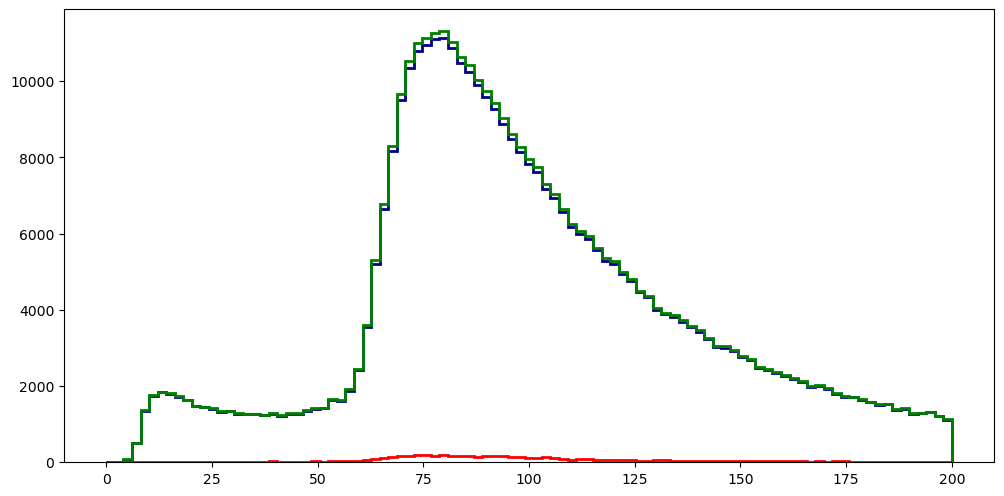

0.749123839450181
3034.7392217708452


In [13]:
#Do a plot of the mass spectrum
plt.figure(figsize=(12,6), dpi= 100)
inv_m = df['p_mass'].values
sigs = df['p_mass'][df['label']==1].values
bkgs = df['p_mass'][df['label']==0].values

xlims=[0,200]
bins = np.linspace(xlims[0],xlims[1],100,endpoint=True)
plt.hist(bkgs, color = 'darkblue', histtype='step', bins=bins,linewidth=2)
plt.hist(sigs, color = 'red', histtype='step', bins=bins,linewidth=2)
plt.hist(inv_m, color = 'green', histtype='step', bins=bins,linewidth=2)
plt.show()

print(min(inv_m))
print(max(inv_m))

In [29]:
with open('./CSVfiles/ggH_sf.data', 'rb') as f:
    df=pickle.load(f)
df

,0,1,2,3,4,5
0,28.4857,55922600.0,0.000000,1.005130,0.999523,1.005130
1,28.4857,55922600.0,0.351687,0.970159,0.997608,0.970159
2,28.4857,55922600.0,0.553627,0.988219,0.998555,0.988219
3,28.4857,55922600.0,0.619412,0.986910,1.000000,0.986910
4,28.4857,55922600.0,0.619412,1.004190,0.994923,1.004190
...,...,...,...,...,...,...
1054705,28.4857,55922600.0,1.251330,0.952824,1.000000,0.952824
1054706,28.4857,55922600.0,1.251330,0.990247,1.000000,0.990247
1054707,28.4857,55922600.0,1.214120,0.998569,1.000000,0.998569
1054708,28.4857,55922600.0,1.320950,0.992051,0.998649,0.992051


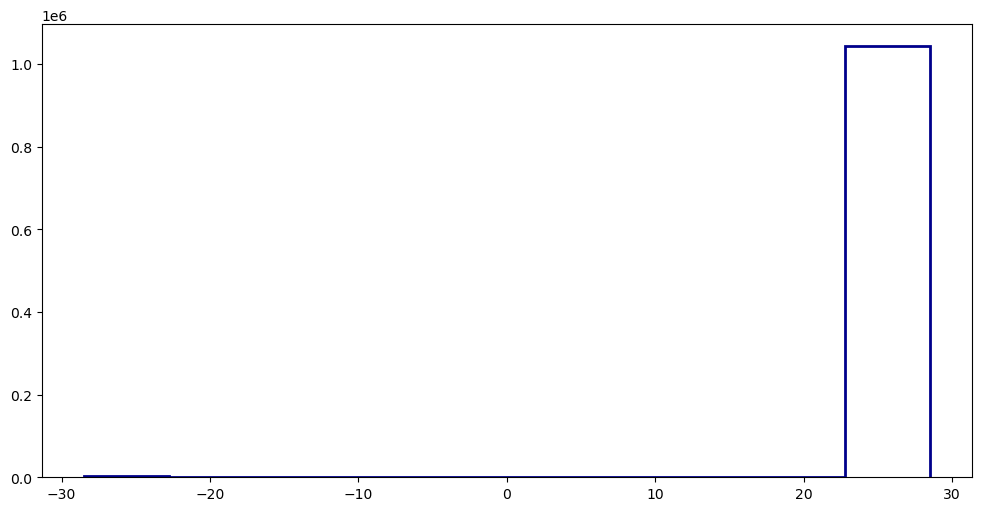

-28.4857
28.4857
2285


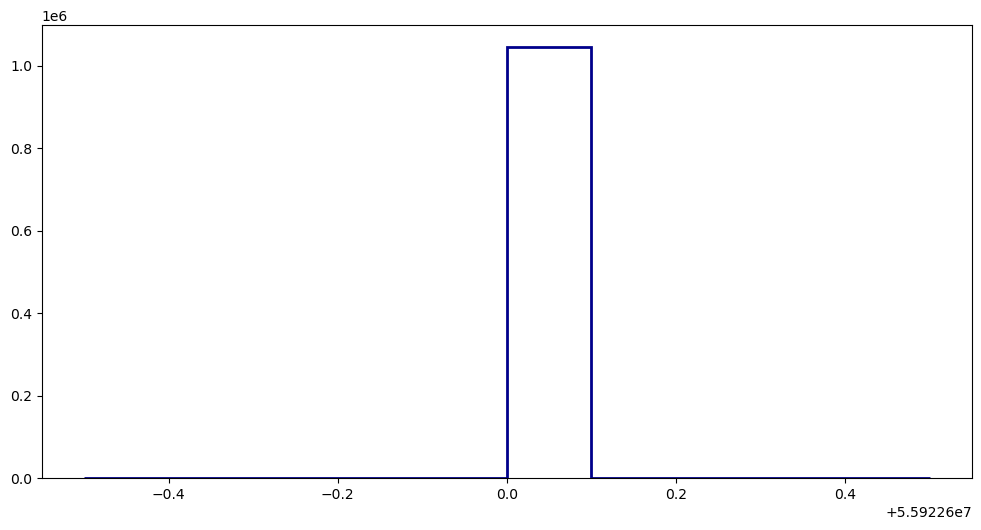

55922600.0
55922600.0


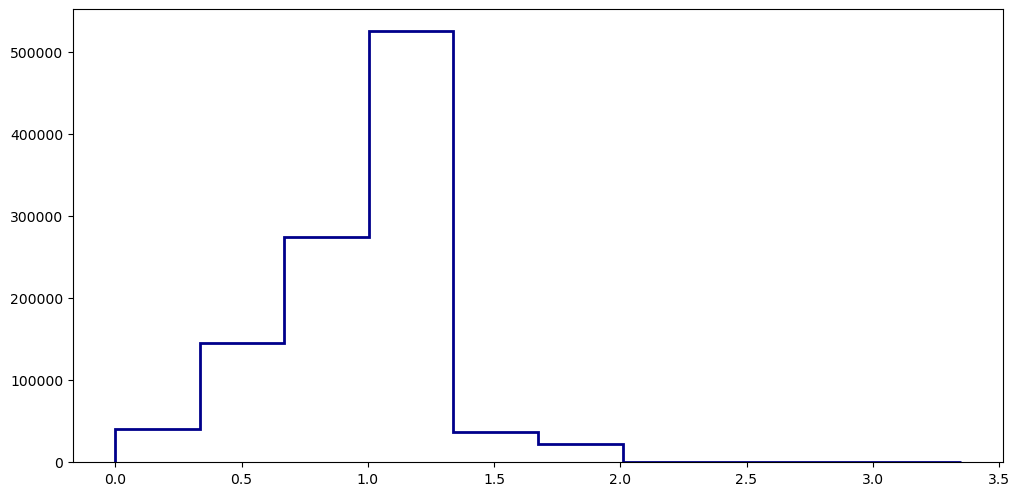

0.0
3.34815


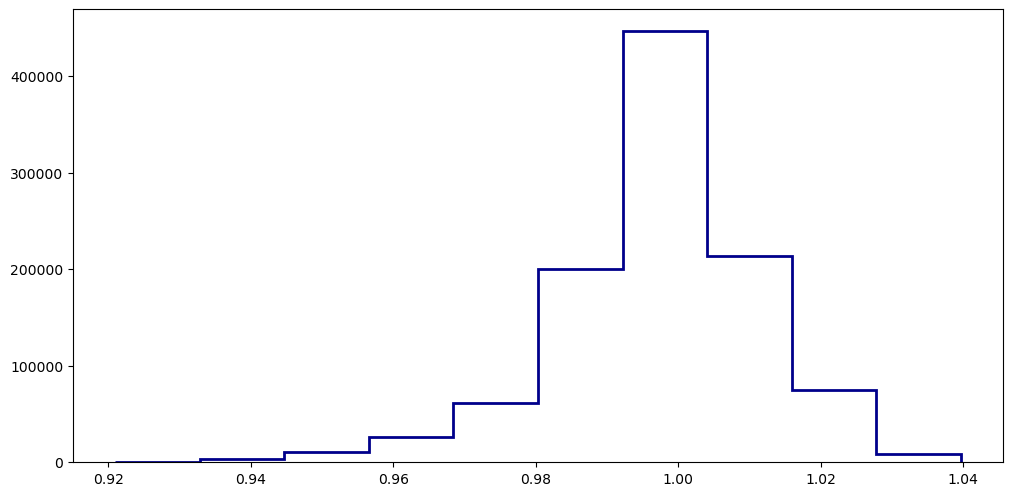

0.9209870000000001
1.0396299999999998


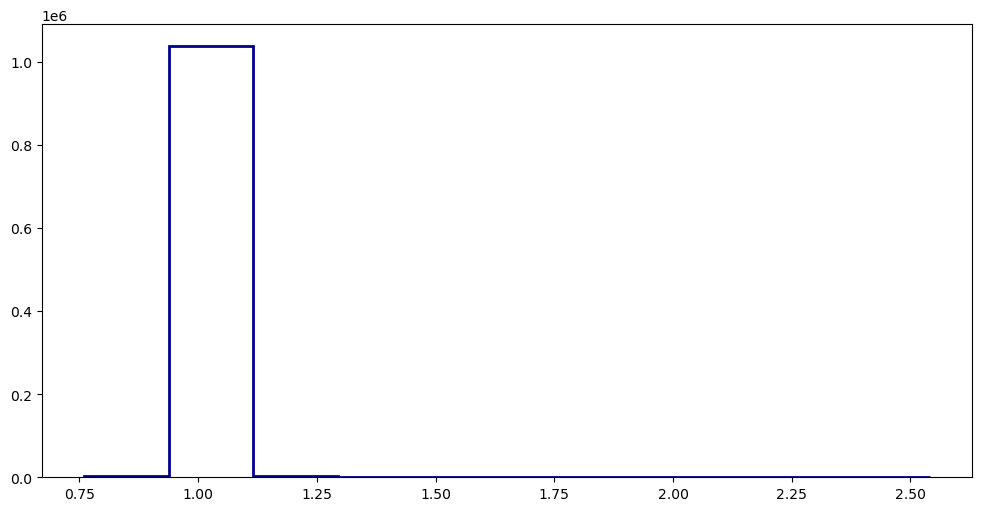

0.760089
2.54019


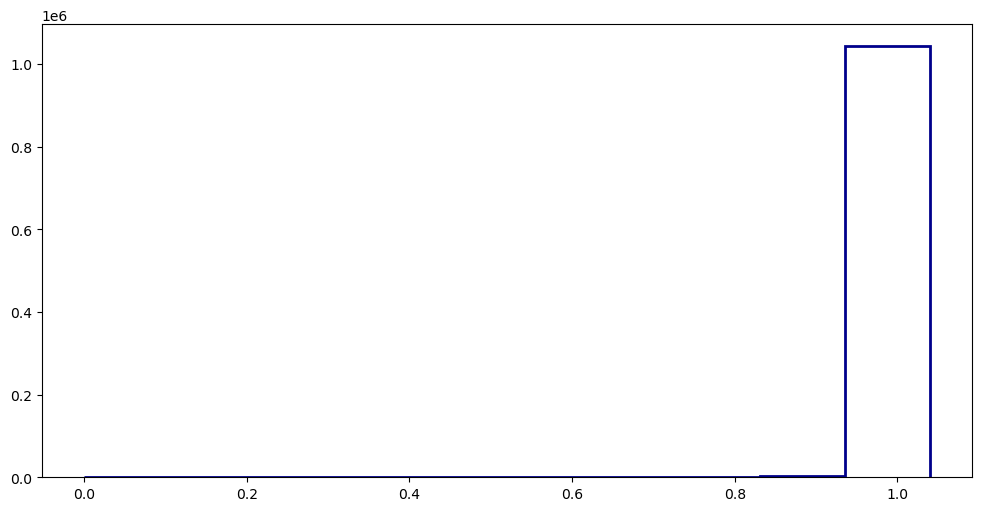

0.0
1.0396299999999998


In [8]:
#Look at scale factors 
mcWeight = df[0]
mcsum = df[1]
pileup = df[2]
photon = df[3]
btag = df[4]
phottrig = df[5]

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(mcWeight, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(mcWeight))
print(max(mcWeight))
print(len(mcWeight[mcWeight<28]))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(mcsum, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(mcsum))
print(max(mcsum))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(pileup, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(pileup))
print(max(pileup))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(photon, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(photon))
print(max(photon))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(btag, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(btag))
print(max(btag))

plt.figure(figsize=(12,6), dpi= 100)
plt.hist(phottrig, color = 'darkblue', histtype='step',linewidth=2)
plt.show()

print(min(phottrig))
print(max(phottrig))